In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import clustering functions
from actual_labels import get_actual_labels
from hclust import hclust
from kmeans import kmeans_for_heatmap
from gmm import gmm
from pam import pam_for_heatmap

In [2]:
# Load in data
DATA_PATH = Path("data") / "SRP120552.tsv"
df = pd.read_csv(DATA_PATH, sep="\t")
df = df.set_index("Gene")

df

,SRR6191750,SRR6191751,SRR6191752,SRR6191753,SRR6191754,SRR6191755,SRR6191756,SRR6191757,SRR6191758,SRR6191759,...,SRR6192398,SRR6192399,SRR6192400,SRR6192401,SRR6192402,SRR6192403,SRR6192404,SRR6192405,SRR6192406,SRR6192407
Gene,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,56.629600,210.765150,0.000000,15.582642,0.000000,3.951188,1.013635,10.157310,12.500870,1.535458,...,143.910830,122.749306,0.000000,122.250435,94.166710,147.495970,0.000000,369.399140,0.000000,2.995046
ENSG00000000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000000419,52.532257,181.474520,250.384250,61.192110,0.854224,29.988983,32.392227,43.866116,34.768540,10.885117,...,0.000000,117.458120,0.000000,9.408690,56.129097,112.473976,7.008246,0.000000,248.942280,0.000000
ENSG00000000457,6.420248,9.038753,6.449249,0.896064,9.391796,1.694619,1.771045,0.890477,15.431188,6.612335,...,0.756136,0.789532,2.880358,3.794541,3.027338,0.790558,3.477984,2.319273,2.393112,236.096450
ENSG00000000460,0.000000,27.647682,0.000000,140.431730,0.000000,15.594472,10.486232,1.409931,43.129833,3.073701,...,0.000000,0.000000,0.000000,0.000000,3.229686,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000286268,0.000000,0.000000,0.000000,0.000000,0.000000,2.140921,0.000000,0.000000,0.000000,1.921149,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000286269,3.012283,6.357253,0.000000,2.920779,12.417953,2.216796,3.025142,2.377553,2.266806,0.000000,...,1.006215,0.000000,0.835804,1.811789,4.883857,1.861232,6.817812,0.000000,0.000000,0.000000
ENSG00000286270,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [3]:
# Filter and sort for top 5000 variable genes
gene_variability = df.T.var(axis=0)
top_5000_indices = gene_variability.sort_values(ascending=False).head(5000).index
top_5000 = df.loc[top_5000_indices].T

top_5000

Gene,ENSG00000210082,ENSG00000198804,ENSG00000198712,ENSG00000198727,ENSG00000198886,ENSG00000198899,ENSG00000198938,ENSG00000251562,ENSG00000198763,ENSG00000211459,...,ENSG00000188785,ENSG00000223960,ENSG00000249915,ENSG00000078687,ENSG00000181817,ENSG00000084733,ENSG00000051620,ENSG00000167693,ENSG00000249437,ENSG00000187742
SRR6191750,5599.750,4601.987300,4125.2964,2734.20140,1673.38540,2339.328400,2439.4944,5277.0170,1081.060700,2619.785600,...,5.119839,24.550419,67.210266,1.751851,12.532421,15.421330,11.990015,0.686648,0.999760,30.020580
SRR6191751,7230.140,7942.763700,10058.2920,6546.20070,4487.42100,4911.369000,4940.0130,25557.4600,3281.558300,1165.463900,...,1.073328,308.631400,284.015800,25.872652,122.215230,262.426970,99.676315,228.725770,134.215480,122.478540
SRR6191752,735357.440,391568.720000,352864.0000,387255.40000,225261.05000,270033.800000,238023.1000,6391.4330,84635.860000,66180.195000,...,11.065000,2.761192,0.000000,0.000000,0.000000,0.000000,14.618929,7.209654,6.446755,6.914004
SRR6191753,7469.360,9359.391000,5511.1875,3957.72220,3340.21120,3572.576000,3550.6338,3499.8147,1997.790500,2604.347400,...,25.790913,17.855942,17.995600,49.667503,0.000000,27.020786,1.286581,4.311105,7.159112,36.046585
SRR6191754,8766.538,85.343575,7439.1680,56.53336,20.48142,54.685753,2989.6790,1256.1317,13.072073,19.884577,...,0.709885,10.790157,914.100500,0.000000,0.000000,0.000000,0.000000,0.000000,0.807569,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SRR6192403,19831.766,4976.292500,13185.2320,8407.10000,6141.42870,4734.336000,7034.2446,52304.2540,3995.972400,1731.459200,...,0.000000,10.141361,49.206787,57.695312,146.490880,39.218490,2.148382,2.361594,8.276861,200.623840
SRR6192404,18816.709,9354.555000,13853.0820,6059.80760,5923.35640,4176.737300,5483.9990,23306.3200,3084.486800,1803.639200,...,2.413695,34.403870,7.847596,0.000000,49.691290,0.000000,27.013287,0.000000,11.660089,6.002738
SRR6192405,8673.412,2280.387200,5620.2540,1360.71750,2601.98630,1368.796400,1581.3860,39778.1130,1863.543500,1039.775600,...,0.000000,46.588814,119.457540,179.151720,149.870530,0.000000,0.000000,0.000000,16.234000,43.513664
SRR6192406,15588.810,2159.225600,9419.2050,6166.48440,5105.62650,3596.666300,5628.1340,31749.2800,3701.223000,1531.713700,...,0.000000,0.000000,225.497710,51.955288,1.880684,249.126790,0.815208,0.000000,121.443530,1.010505


In [4]:
# Log-transform to compress large values
top_5000_logged = np.log1p(top_5000)

# Z-score normalize each gene (row)
top_5000_scaled = top_5000_logged.sub(top_5000_logged.mean(axis=1), axis=0)
top_5000_scaled = top_5000_scaled.div(top_5000_logged.std(axis=1), axis=0)

# Replace any NaNs (from zero std) with 0
top_5000_scaled = top_5000_scaled.fillna(0)

In [5]:
# Get actual labels
original_labels = get_actual_labels()

original_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [6]:
# Get labels for k=8
k = 8

# Hierarchical clustering
hclust_labels = hclust(top_5000, k)
kmeans_labels = kmeans_for_heatmap(top_5000, k)
gmm_labels = gmm(top_5000, k, 5000)
pam_labels = pam_for_heatmap(top_5000, k)

In [7]:
# Create annotations data frame
annotations = pd.DataFrame({
    'hclust': pd.Categorical(hclust_labels),
    'kmeans': pd.Categorical(kmeans_labels),
    'gmm': pd.Categorical(gmm_labels),
    'pam': pd.Categorical(pam_labels),
    'original': pd.Categorical(original_labels),
}, index=top_5000.T.columns)

annotations

,hclust,kmeans,gmm,pam,original
SRR6191750,0,4,3,7,1
SRR6191751,0,3,7,1,1
SRR6191752,1,1,2,2,1
SRR6191753,0,2,3,3,1
SRR6191754,0,4,3,7,1
...,...,...,...,...,...
SRR6192403,3,0,0,0,3
SRR6192404,0,2,7,1,3
SRR6192405,3,0,0,0,3
SRR6192406,0,5,7,1,3


In [8]:
# Create color pallete
unique_groups = annotations['original'].unique()
group_palette = sns.color_palette("Set2", len(unique_groups))
group_colors = dict(zip(unique_groups, group_palette))

cluster_palette = sns.color_palette("tab10", k)
cluster_colors = dict(zip(range(k), cluster_palette))

cluster_colors

{0: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 1: (1.0, 0.4980392156862745, 0.054901960784313725),
 2: (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 3: (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 4: (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 5: (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 6: (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 7: (0.4980392156862745, 0.4980392156862745, 0.4980392156862745)}

In [9]:
col_colors = pd.DataFrame({
    "hclust": annotations["hclust"].astype(int).map(dict(zip(range(k), sns.color_palette("tab10", k)))),
    "kmeans": annotations["kmeans"].astype(int).map(dict(zip(range(k), sns.color_palette("Set2", k)))),
    "gmm": annotations["gmm"].astype(int).map(dict(zip(range(k), sns.color_palette("Dark2", k)))),
    "pam": annotations["pam"].astype(int).map(dict(zip(range(k), sns.color_palette("Dark2", k)))),
    "original": annotations["original"].astype(int).map(dict(zip(annotations["original"].unique(), sns.color_palette("Set1", len(annotations["original"].unique())))))
}, index=annotations.index)

col_colors

,hclust,kmeans,gmm,pam,original
SRR6191750,"(0.12156862745098039, 0.4666666666666667, 0.70...","(0.6509803921568628, 0.8470588235294118, 0.329...","(0.9058823529411765, 0.1607843137254902, 0.541...","(0.4, 0.4, 0.4)","(0.8941176470588236, 0.10196078431372549, 0.10..."
SRR6191751,"(0.12156862745098039, 0.4666666666666667, 0.70...","(0.9058823529411765, 0.5411764705882353, 0.764...","(0.4, 0.4, 0.4)","(0.8509803921568627, 0.37254901960784315, 0.00...","(0.8941176470588236, 0.10196078431372549, 0.10..."
SRR6191752,"(1.0, 0.4980392156862745, 0.054901960784313725)","(0.9882352941176471, 0.5529411764705883, 0.384...","(0.4588235294117647, 0.4392156862745098, 0.701...","(0.4588235294117647, 0.4392156862745098, 0.701...","(0.8941176470588236, 0.10196078431372549, 0.10..."
SRR6191753,"(0.12156862745098039, 0.4666666666666667, 0.70...","(0.5529411764705883, 0.6274509803921569, 0.796...","(0.9058823529411765, 0.1607843137254902, 0.541...","(0.9058823529411765, 0.1607843137254902, 0.541...","(0.8941176470588236, 0.10196078431372549, 0.10..."
SRR6191754,"(0.12156862745098039, 0.4666666666666667, 0.70...","(0.6509803921568628, 0.8470588235294118, 0.329...","(0.9058823529411765, 0.1607843137254902, 0.541...","(0.4, 0.4, 0.4)","(0.8941176470588236, 0.10196078431372549, 0.10..."
...,...,...,...,...,...
SRR6192403,"(0.8392156862745098, 0.15294117647058825, 0.15...","(0.4, 0.7607843137254902, 0.6470588235294118)","(0.10588235294117647, 0.6196078431372549, 0.46...","(0.10588235294117647, 0.6196078431372549, 0.46...","(0.596078431372549, 0.3058823529411765, 0.6392..."
SRR6192404,"(0.12156862745098039, 0.4666666666666667, 0.70...","(0.5529411764705883, 0.6274509803921569, 0.796...","(0.4, 0.4, 0.4)","(0.8509803921568627, 0.37254901960784315, 0.00...","(0.596078431372549, 0.3058823529411765, 0.6392..."
SRR6192405,"(0.8392156862745098, 0.15294117647058825, 0.15...","(0.4, 0.7607843137254902, 0.6470588235294118)","(0.10588235294117647, 0.6196078431372549, 0.46...","(0.10588235294117647, 0.6196078431372549, 0.46...","(0.596078431372549, 0.3058823529411765, 0.6392..."
SRR6192406,"(0.12156862745098039, 0.4666666666666667, 0.70...","(1.0, 0.8509803921568627, 0.1843137254901961)","(0.4, 0.4, 0.4)","(0.8509803921568627, 0.37254901960784315, 0.00...","(0.596078431372549, 0.3058823529411765, 0.6392..."


C:\Users\danie\AppData\Local\Temp\ipykernel_42304\784675954.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  g.ax_col_dendrogram.legend(


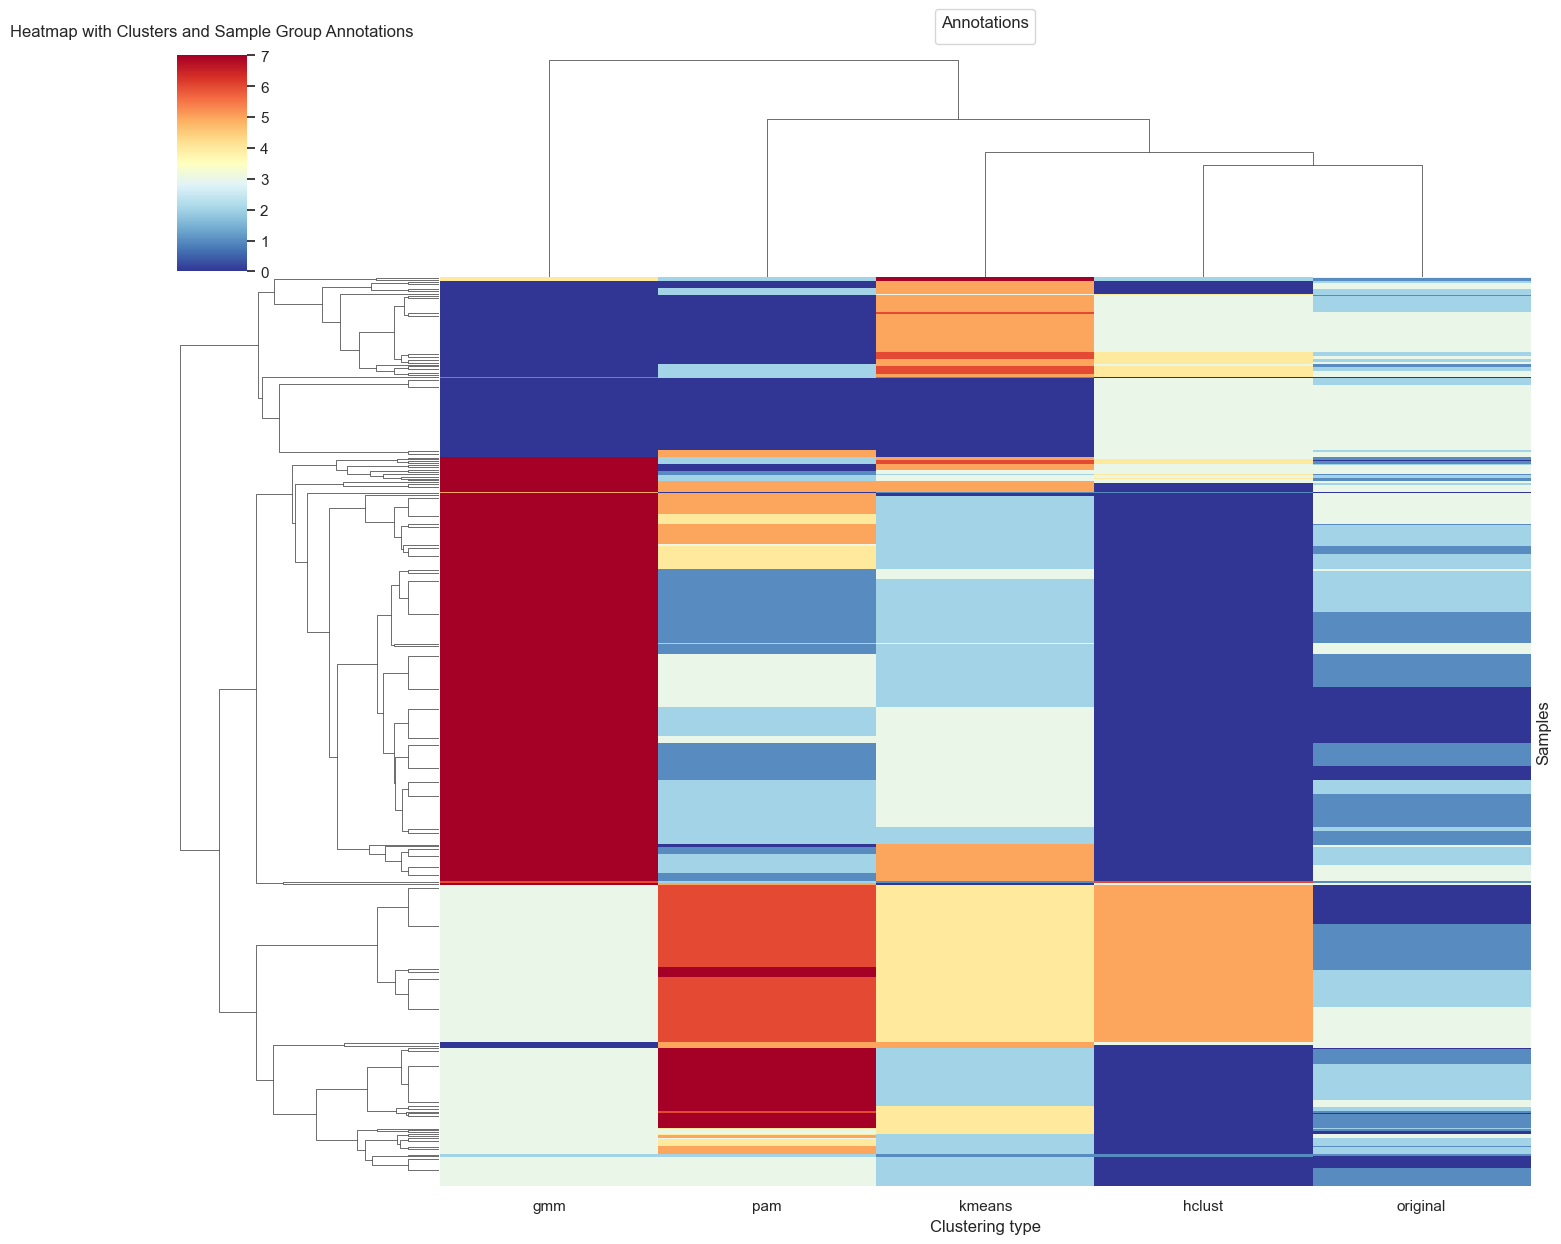

In [10]:
# Create heatmap with dendrograms
sns.set(style="white")
g = sns.clustermap(
    annotations, 
    row_cluster=True, 
    col_cluster=True,
    cmap="RdYlBu_r", 
    figsize=(14, 12),
    xticklabels=True, 
    yticklabels=False
)

g.ax_col_dendrogram.legend(
    loc="center",
    ncol=2,
    bbox_to_anchor=(0.5, 1.1),
    title="Annotations"
)

g.ax_heatmap.set_xlabel("Clustering type")
g.ax_heatmap.set_ylabel("Samples")
plt.title("Heatmap with Clusters and Sample Group Annotations", y=1.05)

plt.show()